<div align=center><h1>Исследование объявлений о продаже квартир

## Описание проекта

Исходные данные — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Описание данных


- total_images — число фотографий квартиры в объявлении

- last_price — цена на момент снятия с публикации

- total_area — площадь квартиры в квадратных метрах (м²)

- first_day_exposition — дата публикации

- rooms — число комнат

- ceiling_height — высота потолков (м)

- floors_total — всего этажей в доме

- living_area — жилая площадь в квадратных метрах(м²)

- floor — этаж

- is_apartment — апартаменты (булев тип)

- studio — квартира-студия (булев тип)

- open_plan — свободная планировка (булев тип)

- kitchen_area — площадь кухни в квадратных метрах (м²)

- balcony — число балконов

- locality_name — название населённого пункта
 
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

- cityCenters_nearest — расстояние до центра города (м)

- parks_around3000 — число парков в радиусе 3 км

- parks_nearest — расстояние до ближайшего парка (м)

- ponds_around3000 — число водоёмов в радиусе 3 км

- ponds_nearest — расстояние до ближайшего водоёма (м)

- days_exposition — сколько дней было размещено объявление (от публикации до снятия)


### Шаг 1. Изучим общую информацию о данных

Добавим все библиотеки, которые понадобятся нам в работе:

In [1]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
real_estate_data = pd.read_csv('real_estate_data.csv', sep = '\t')
real_estate_data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [3]:
real_estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Вывод

1) Довольно во многих столбцах есть пропуски данных: ceiling_height, floors_total, living_area, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition. Нужно посмотреть на каждый столбц по отдельности и решить что делать с пропусками.

2) У части данных некорректно определился тип:
- first_day_exposition - удобнее поменять на тип данных datetime64

- is_apartment - тип этого столбца должен быть bool (тк это булев массив).

### Шаг 2. Предобработка данных

Изучим столбцы с пропусками в данных, начнем со столбца is_apartment:

In [4]:
real_estate_data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [5]:
(real_estate_data['is_apartment'] == False).sum()

2725

In [6]:
(real_estate_data['is_apartment'] == True).sum()

50

В столбце 2775 значений, всего 50 из которых - True. Но тк аппартаменты - редкое явление, то предположу, что все остальные незаполненные значения (Nan) - тоже относятся к False (то есть если недвижимость не является апартаментами - то в ячейку со значением просто ничего не ставили и поэтому она Nan). Заменю пропущенные значения на False.

In [7]:
real_estate_data['is_apartment'] = real_estate_data['is_apartment'].fillna(value = False)

In [8]:
real_estate_data['is_apartment'].isna().sum()

0

Теперь посмотрим на столбец floors_total.

In [9]:
real_estate_data['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

In [10]:
real_estate_data['floors_total'].isna().sum()

86

Тк пропусков всего 86 (из 23699), то предположу, что значение пропускали, тк точно не знали этаж (такое возможно если владелец там не ивет или владеет несколькими объектами недвижимости), либо это не многоэтажный дом и количество этажей и так понятно по фотографии в объявлении. Посмотрим на эти данные поближе.

In [11]:
real_estate_data.loc[real_estate_data['floors_total'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,NaN,NaN,30.80,4,False,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,NaN,NaN,20.75,1,False,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,NaN,NaN,38.40,12,False,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,NaN,NaN,47.10,8,False,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,NaN,NaN,NaN,9,False,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.0,63.5,2017-05-24T00:00:00,2,2.8,NaN,NaN,3,False,...,NaN,NaN,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4574160.0,64.5,2017-04-02T00:00:00,2,NaN,NaN,31.70,20,False,...,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263.0,110.4,2016-11-20T00:00:00,3,NaN,NaN,45.38,6,False,...,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21187872.0,123.3,2017-04-25T00:00:00,3,NaN,NaN,50.40,18,False,...,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


Никакой связи между данными с пропусками на первый взгляд не видно, поэтому оставлю предположение, что эти данные были не известны или эту графу случайно пропустили. Тк это всего 3% данных, то можно заменить эти пропуски на медианное значение.

In [12]:
real_estate_data['floors_total'] = real_estate_data['floors_total'].fillna(value =  real_estate_data['floors_total'].median())


In [13]:
real_estate_data['floors_total'].isna().sum()

0

Посмотрим не появились ли в данных такие строчки, в которых после замены медианным значением всего этажей в доме стало меньше, чем этаж, на котором находится квартира.

In [14]:
real_estate_data.loc[real_estate_data['floors_total'] < real_estate_data['floor']]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
457,4,9788348.0,70.80,2015-08-01T00:00:00,2,NaN,9.0,38.40,12,False,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
2392,7,5395770.0,53.00,2017-06-29T00:00:00,2,NaN,9.0,29.00,22,False,...,9.00,0.0,Санкт-Петербург,43074.0,10820.0,0.0,NaN,0.0,NaN,48.0
2846,4,2325000.0,27.80,2016-09-21T00:00:00,1,NaN,9.0,19.40,15,False,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,307.0
3031,9,6400000.0,56.70,2018-03-27T00:00:00,2,NaN,9.0,32.00,12,False,...,12.00,NaN,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,231.0
3438,10,4100000.0,38.00,2018-04-14T00:00:00,1,NaN,9.0,19.00,12,False,...,10.30,NaN,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,95.0
4617,4,4275062.0,61.20,2017-04-27T00:00:00,2,NaN,9.0,32.00,12,False,...,12.20,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,72.0
4848,15,13000000.0,98.00,2017-02-08T00:00:00,3,NaN,9.0,NaN,18,False,...,NaN,0.0,Санкт-Петербург,37625.0,14153.0,0.0,NaN,0.0,NaN,29.0
5146,10,3085024.0,33.33,2018-10-06T00:00:00,1,NaN,9.0,11.00,12,False,...,NaN,NaN,Санкт-Петербург,47303.0,25865.0,1.0,400.0,1.0,492.0,140.0
5187,5,3300000.0,25.40,2018-11-02T00:00:00,0,NaN,9.0,NaN,15,False,...,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,3.0
5784,4,4262941.0,59.90,2017-04-02T00:00:00,2,NaN,9.0,31.70,18,False,...,11.90,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0


Такие строчки есть - заменим их на этаж, на котором находится квартира (их не много, поэтому это не сильно повлияет на данные).

In [15]:
real_estate_data.loc[(real_estate_data['floors_total'] < real_estate_data['floor']), 'floors_total'] = real_estate_data.loc[(real_estate_data['floors_total'] < real_estate_data['floor']), 'floor']

Количество заполненных строк в "числе парков в радиусе 3 км"(parks_around3000) и в "числе водоемов в радиусе 3 км"(ponds_around3000) одинаковое - 18181 (а еще очень близкое к ним - "расстояние до центра города (м)" - cityCenters_nearest - 18180 и "расстояние до ближайшего аэропорта в метрах (м)" - airports_nearest - 18157). Посмотрим на эти данные поближе и выясним не связаны ли они.

In [16]:
real_estate_data.loc[(~real_estate_data['parks_around3000'].isna()) & (~real_estate_data['ponds_around3000'].isna()) & (~real_estate_data['cityCenters_nearest'].isna()) & (~real_estate_data['airports_nearest'].isna())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,False,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,False,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23690,3,5500000.0,52.00,2018-07-19T00:00:00,2,NaN,5.0,31.0,2,False,...,6.00,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23691,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.3,7,False,...,10.60,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.0,8,False,...,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,False,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN


Да, предположение, что заполненность этих данных связана, оказалось верным.

Тк нам известно, что часть данных вводилось вручную, а часть заполнялось автоматически на основе картографических данных, то предполагаю, что эти данные - кол-во парков вокруг и удаленность от центра и от аэропорта - как раз заполнялись автоматически. 

Посмотрим также что в таблице есть в расстоянии до ближайшего парка и пруда, если все предыдущие значения -  Nan (предположительно, это тоже должно браться из  картографических данных).

In [17]:
real_estate_data.loc[(real_estate_data['parks_around3000'].isna()) & (real_estate_data['ponds_around3000'].isna()) & (real_estate_data['cityCenters_nearest'].isna()) & (real_estate_data['airports_nearest'].isna()) & (~real_estate_data['parks_nearest'].isna()) & (~real_estate_data['ponds_nearest'].isna())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Выяснилось, что при такой фильтрации - тоже нет данных.
То есть, я предполагаю, что система должна автоматически определять местоположение по введенному пользователем адресу, но это не всегда срабатывает. Например, адрес мог быть введен некорректно или установленный на сайте модуль для нахождения местоположения недвижимости имеет ограничения по распознаванию определенных територий. Тогда никаких данных о ближайших парках мы естественно не получим, потому что не знаем где конкретно находится недвижимость.

В нашем случае мы не знаем этого для примерно 5,5 тыс строк из 23599 (это около 25%), что совсем не мало и просто выбросить эти данные - значило бы сильно исказить результаты анализа. Но и заменить эти данные особо нечем, тк как ставить медианные растояния видится мне неуместным решением. Поэтому оставим эти Nan в данных, а если понадобится работать с этими столбцами - будем использовать только заполненные значения.

Посмотрим на столбец c жилой площадью в квадратных метрах - living_area.

In [18]:
real_estate_data['living_area'].isna().sum()

1903

Меньше 10% пропусков - не слишком много, но и терять не хочется. Восстановить площать квартиры можно, например, по среднему/медиане квартир с таким же кол-вом комнат. Используем медиану.

In [19]:
real_estate_data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

In [20]:
for i in real_estate_data['rooms'].unique():
    current_square_meters = (real_estate_data.loc[real_estate_data['rooms'] == i])['living_area'].median()
    real_estate_data.loc[((real_estate_data['rooms'] ==i) & (real_estate_data['living_area'].isna())), 'living_area'] = current_square_meters
    

In [21]:
real_estate_data['living_area'].isna().sum()

0

Мы заменили все пропуски в площади квартир. Теперь посмотрим на столбец ceiling_height — высоту потолков (м).

In [22]:
real_estate_data['ceiling_height'].isna().sum()

9195

Здесь пропусков много - около 40%. Нужно или оставлять данные как есть, но если потом использовать их - то использовать только заполненные значения, или же заменить, например на основе территории и кол-ва этажей в доме (предположив, что это поможет найти медианную или среднюю высоту потолка достаточно точно). Используем последний вариант.

In [23]:
for i in real_estate_data['locality_name'].unique():
    for n in real_estate_data['floors_total'].unique():
        nan_slice = real_estate_data.loc[(real_estate_data['locality_name'] == i) & (real_estate_data['floors_total'] == n), 'ceiling_height']
        if nan_slice.isna().all():
            current_ceiling_height_2 = real_estate_data.loc[real_estate_data['floors_total'] == n, 'ceiling_height'].median()
            real_estate_data.loc[((real_estate_data['floors_total'] == n) & (real_estate_data['ceiling_height'].isna())), 'ceiling_height'] = current_ceiling_height_2
        else:
            current_ceiling_height = nan_slice.median()
            real_estate_data.loc[((real_estate_data['locality_name'] == i) & (real_estate_data['floors_total'] == n) & (real_estate_data['ceiling_height'].isna())), 'ceiling_height'] = current_ceiling_height

In [24]:
real_estate_data['ceiling_height'].isna().sum()

1

В цикле мы пробуем отловить исключения, когда при определенных сочетаниях условий города и кол-ва этажей в доме, существуют только строки где ceiling_height = Nan,  и тогда медиану по ним строить не получается и они остаются с Nan. Эти строки мы обрабатываем, учитывая только этажность здания, и не учитывая город (таких строк всего 400 с небольшим - поэтому сильно данные мы ими не испортим). После этого остается всего одна строка - исключение. Не будем тратить время на ее отлавливание, просто добавим строчку с ее удалением в конце работы с заполнением пропусков.

Посмотрим на столбец balcony — число балконов.

In [25]:
real_estate_data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [26]:
real_estate_data['balcony'].isna().sum()

11519

<AxesSubplot:>

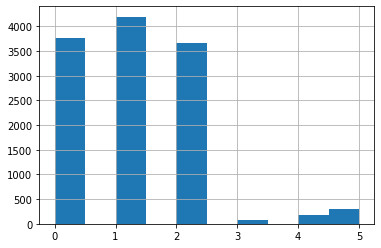

In [27]:
real_estate_data['balcony'].hist()

Почти половина недвижимости - с пропущенными данными о кол-ве балконов. Здесь, мне кажется разумным опять же заменить все пропуски на ноль (просто потому что люди часто не заполняют данные потому, что этой харакреристики у недвижимости нет, да и, если подумать и Петербурге, - то это не город балконов, и в близлежащих деревнях и поселках балконы тоже не так уж часто встретишь).

In [28]:
real_estate_data['balcony'] = real_estate_data['balcony'].fillna(value = 0)

In [29]:
real_estate_data['balcony'].isna().sum()

0

Посмотрим на столбец kitchen_area.

In [30]:
real_estate_data['kitchen_area'].isna().sum()

2278

Пропусков здесь - чуть меньше 10%. Предполагаю, что часть этих данных - и должны быть Nan, потому что если это open plan, например, - то нельзя сказать сколько в нем места занимает кухня, тоже самое может быть со студией и с апартаментами (которые юридически не считаются жилым помещением, а поэтому может быть там также не указывается размер кухни).

In [31]:
real_estate_data.loc[(real_estate_data['kitchen_area'].isna()) & (real_estate_data['open_plan'] == True)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
349,4,2320000.0,25.0,2017-09-27T00:00:00,0,2.60,14.0,17.0,1,False,...,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
508,0,3375000.0,34.4,2017-03-28T00:00:00,0,2.75,26.0,24.3,19,False,...,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
780,9,2600000.0,26.1,2018-02-20T00:00:00,0,2.70,18.0,18.0,8,False,...,NaN,1.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
839,14,1900000.0,35.0,2017-04-14T00:00:00,0,2.70,5.0,15.0,3,False,...,NaN,1.0,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,7.0
946,5,2200000.0,23.0,2016-09-27T00:00:00,0,2.70,27.0,18.0,7,False,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,483.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21299,13,2450000.0,28.5,2017-11-22T00:00:00,0,2.65,12.0,18.0,7,False,...,NaN,2.0,Санкт-Петербург,20381.0,19383.0,0.0,NaN,1.0,579.0,73.0
21628,9,3900000.0,34.0,2017-03-18T00:00:00,0,2.75,20.0,24.0,10,False,...,NaN,2.0,Санкт-Петербург,15506.0,13615.0,0.0,NaN,1.0,767.0,320.0
22573,8,2250000.0,24.0,2017-09-28T00:00:00,0,2.65,12.0,15.0,3,False,...,NaN,2.0,городской посёлок Новоселье,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23442,0,2500000.0,27.7,2017-09-28T00:00:00,0,2.75,24.0,18.0,4,False,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.0


In [32]:
real_estate_data.loc[(real_estate_data['kitchen_area'].isna()) & (real_estate_data['studio'] == True)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,2.75,24.0,15.50,2,False,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,2.70,17.0,24.75,4,False,...,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,2.60,10.0,18.00,7,False,...,NaN,0.0,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
697,12,2500000.0,24.10,2017-12-01T00:00:00,0,2.75,25.0,17.50,21,False,...,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,201.0
716,5,1500000.0,17.00,2017-06-07T00:00:00,0,2.70,9.0,12.00,1,False,...,NaN,0.0,посёлок Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22867,8,3090000.0,30.00,2017-12-17T00:00:00,0,2.75,25.0,18.20,5,False,...,NaN,0.0,Санкт-Петербург,35250.0,16414.0,0.0,NaN,1.0,400.0,211.0
22877,2,4280000.0,28.00,2017-10-26T00:00:00,0,2.70,19.0,18.00,10,False,...,NaN,0.0,Санкт-Петербург,18982.0,7206.0,0.0,NaN,1.0,415.0,151.0
23210,7,3200000.0,26.00,2017-09-01T00:00:00,0,2.75,25.0,18.00,16,False,...,NaN,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23554,15,3350000.0,26.00,2018-09-07T00:00:00,0,2.75,19.0,18.00,8,False,...,NaN,0.0,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0


In [33]:
real_estate_data.loc[(real_estate_data['kitchen_area'].isna()) & (real_estate_data['is_apartment'] == True)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
543,11,12790000.0,56.6,2018-11-06T00:00:00,2,3.50,3.0,29.40,1,True,...,NaN,0.0,Петергоф,35248.0,30437.0,3.0,53.0,3.0,22.0,NaN
916,11,8183000.0,70.0,2018-01-11T00:00:00,2,3.12,3.0,40.00,3,True,...,NaN,2.0,Санкт-Петербург,45796.0,21729.0,0.0,NaN,1.0,754.0,179.0
1608,12,2150000.0,20.1,2019-01-30T00:00:00,1,2.55,9.0,17.60,1,True,...,NaN,0.0,Санкт-Петербург,26646.0,12147.0,0.0,NaN,0.0,NaN,13.0
2759,11,7500000.0,152.0,2018-07-27T00:00:00,3,3.00,3.0,45.00,1,True,...,NaN,1.0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,7.0
4339,19,6900000.0,72.0,2019-03-25T00:00:00,3,3.50,4.0,70.00,1,True,...,NaN,0.0,Санкт-Петербург,31487.0,4466.0,2.0,353.0,1.0,439.0,22.0
5809,10,7900000.0,74.0,2019-02-12T00:00:00,3,3.55,6.0,56.00,3,True,...,NaN,0.0,Санкт-Петербург,31006.0,3075.0,2.0,123.0,3.0,274.0,6.0
6353,0,11620701.0,122.3,2018-10-01T00:00:00,2,2.80,3.0,30.50,3,True,...,NaN,0.0,Санкт-Петербург,44870.0,20802.0,0.0,NaN,1.0,792.0,NaN
6561,20,10500000.0,100.0,2019-03-22T00:00:00,3,2.65,4.0,51.00,4,True,...,NaN,0.0,Санкт-Петербург,44812.0,10500.0,0.0,NaN,0.0,NaN,NaN
6871,14,6100000.0,58.0,2018-07-25T00:00:00,2,3.10,4.0,30.50,3,True,...,NaN,0.0,Санкт-Петербург,45942.0,20802.0,0.0,NaN,1.0,792.0,126.0
11179,8,3676365.0,33.0,2018-07-23T00:00:00,1,3.00,4.0,27.06,1,True,...,NaN,0.0,Санкт-Петербург,46015.0,20802.0,0.0,NaN,1.0,792.0,NaN


149 + 15 + 67 = это только 231/2278

Посмотрим можно ли подтянуть остальные данные, используя общую площать недвижимости - total_area и жилую площадь в квадратных метрах(м²) - living_area, например.

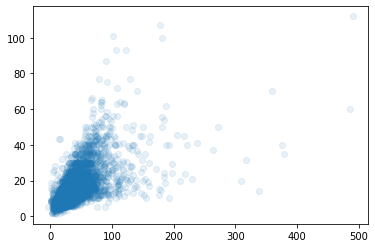

In [34]:
plt.scatter(real_estate_data['total_area'] - real_estate_data['living_area'], real_estate_data['kitchen_area'], alpha=0.1)


Видим, что зависимость вроде бы есть, но какая-то шаткая. Посмотрим на эти данные поближе.

In [35]:
real_estate_data.loc[real_estate_data['kitchen_area'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.60,14.0,45.0,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,2.55,9.0,17.6,2,False,...,NaN,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.50,5.0,30.5,1,False,...,NaN,0.0,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,2.76,22.0,17.6,3,False,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
59,15,6300000.0,46.5,2017-03-06T00:00:00,1,2.70,13.0,17.6,13,False,...,NaN,0.0,Санкт-Петербург,11125.0,14501.0,0.0,NaN,0.0,NaN,336.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23655,1,2414306.0,40.5,2016-09-08T00:00:00,1,2.56,18.0,19.6,10,False,...,NaN,0.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,627.0
23663,12,6400000.0,88.0,2018-01-12T00:00:00,4,2.55,10.0,63.6,1,False,...,NaN,0.0,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23670,9,2450000.0,45.6,2018-02-08T00:00:00,1,2.80,9.0,17.6,2,False,...,NaN,0.0,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23679,0,2500000.0,35.0,2017-12-08T00:00:00,1,2.55,9.0,17.6,4,False,...,NaN,0.0,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0


Даже по нескольким строкам видно, что в этих данных также много пропусков о жилой площади и с автоматическими параметрами тоже какие-то проблемы. Я бы не стала восстанавливать данные дальше, оставлю предположение, что остальные данные имеют право существовать без данных о размерах кухни (данные были не известны или жилье только строится, наприме, и пока известна только общая площадь квартиры).

Посмотрим на столбец days_exposition — сколько дней было размещено объявление (от публикации до снятия).

In [36]:
real_estate_data['days_exposition'].isna().sum()

3181

<AxesSubplot:>

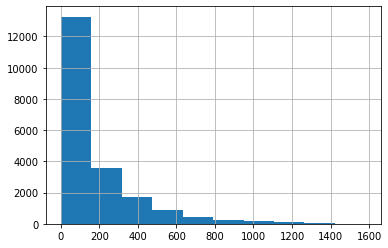

In [37]:
real_estate_data['days_exposition'].hist()

In [38]:
real_estate_data['days_exposition'].min()

1.0

In [39]:
real_estate_data['days_exposition'].max()

1580.0

<AxesSubplot:>

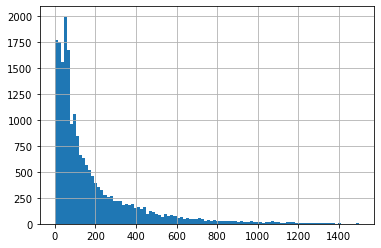

In [40]:
real_estate_data['days_exposition'].hist(bins = 100, range=(0,1500), grid = True)

Изучив данные, стало понятно, что большинство квартир продается (или снимается с публикации) за первые 100 дней. У нас есть 13% пропущенных значений - предполагаю, что это часть недвижимости, которая все еще продается в момент, когда данные были сняты, соответственно заменять пропуски здесь не нужно.

Посмотрим на столбец locality_name - названия населенных пунктов.

In [41]:
real_estate_data['locality_name'].isna().sum()

49

In [42]:
real_estate_data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Тк пропусков населенных пунктов всего 49, и здесь мы не можем просто подставить медиану, то просто удалим эти 2% значений из данных, тк строить предположения о цене, не зная место - бесполезно, даже в одном городе, но в разных местах, цена будет очень разной.

In [43]:
real_estate_data = real_estate_data.loc[~real_estate_data['locality_name'].isna()]

In [44]:
real_estate_data['locality_name'].isna().sum()

0

Удалим лишнюю одну строчку с Nan, которая осталась после обработки данных в столбце ceiling_height.

In [45]:
real_estate_data = real_estate_data.loc[~real_estate_data['ceiling_height'].isna()]

Перейдем к замене типов данных.

In [46]:
real_estate_data['is_apartment'] = real_estate_data['is_apartment'].astype('bool')

In [47]:
real_estate_data['balcony'] = real_estate_data['balcony'].astype('int64')

Переведем first_day_exposition — в формат datetime (сейчас он распознался как тип object).

In [48]:
real_estate_data['first_day_exposition'] = pd.to_datetime(real_estate_data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')
print(real_estate_data['first_day_exposition'].dt.strftime('%H:%M:%S').unique())

['00:00:00']


Время в дате публикации не используется - оно всегда 00:00:00. 

In [49]:
real_estate_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23649 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23649 non-null  int64         
 1   last_price            23649 non-null  float64       
 2   total_area            23649 non-null  float64       
 3   first_day_exposition  23649 non-null  datetime64[ns]
 4   rooms                 23649 non-null  int64         
 5   ceiling_height        23649 non-null  float64       
 6   floors_total          23649 non-null  float64       
 7   living_area           23649 non-null  float64       
 8   floor                 23649 non-null  int64         
 9   is_apartment          23649 non-null  bool          
 10  studio                23649 non-null  bool          
 11  open_plan             23649 non-null  bool          
 12  kitchen_area          21380 non-null  float64       
 13  balcony         

### Вывод

1) Были заполнены пропуски в следующих столбцах: is_apartment, floors_total, ceiling_height, living_area, balcony.

А в части столбцов было решено оставить пропуски (тк нет данных по которым восстановление значений будет достаточно достоверным): cityCenters_nearest, airports_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, kitchen_area, days_exposition.

А данные с пропущенным местоположением было решено удалить: locality_name.

2) У части данных был заменен тип данных: is_apartment, balcony, first_day_exposition.

### Шаг 3. Посчитаем и добавим в таблицу дополнительные данные

Найдем цену квадратного метра недвижимости:

In [50]:
real_estate_data['cost_per_square_metre'] = real_estate_data['last_price'] / real_estate_data['total_area']
real_estate_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_square_metre
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370
1,7,3350000.0,40.4,2018-12-04,1,2.77,11.0,18.6,1,False,...,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079
2,10,5196000.0,56.0,2015-08-20,2,2.60,5.0,34.3,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286
3,0,64900000.0,159.0,2015-07-24,3,2.60,14.0,45.0,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000


Добавим в таблицу данные о дне недели, месяце и годе публикации каждого объявления:

In [51]:
real_estate_data['first_day_exposition_weekday'] = real_estate_data['first_day_exposition'].dt.weekday
real_estate_data['first_day_exposition_month'] = real_estate_data['first_day_exposition'].dt.month
real_estate_data['first_day_exposition_year'] = real_estate_data['first_day_exposition'].dt.year
real_estate_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_square_metre,first_day_exposition_weekday,first_day_exposition_month,first_day_exposition_year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.77,11.0,18.6,1,False,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.60,5.0,34.3,4,False,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.60,14.0,45.0,9,False,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018


Добавим в таблицу стобец с категорией этажа квартиры. Варианты: первый, последний, другой.

In [52]:
def define_floor_category(row):
    if row['floor'] == row['floors_total']:
        return 'последний'
    if row['floor'] == 1:
        return 'первый'
    else:
        return 'другой'
    
real_estate_data['floor_category'] = real_estate_data.apply(define_floor_category, axis=1)
real_estate_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_square_metre,first_day_exposition_weekday,first_day_exposition_month,first_day_exposition_year,floor_category
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.77,11.0,18.6,1,False,...,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.60,5.0,34.3,4,False,...,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,2.60,14.0,45.0,9,False,...,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой


Добавим в таблицу соотношение жилой и общей площади недвижимости, а также отношение площади кухни к общей площади недвижимости.

In [53]:
real_estate_data['living/total_area'] = real_estate_data['living_area'] / real_estate_data['total_area']
real_estate_data['kitchen/total_area'] = real_estate_data['kitchen_area'] / real_estate_data['total_area']
real_estate_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,cost_per_square_metre,first_day_exposition_weekday,first_day_exposition_month,first_day_exposition_year,floor_category,living/total_area,kitchen/total_area
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,2.0,755.0,NaN,120370.370370,3,3,2019,другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.77,11.0,18.6,1,False,...,0.0,NaN,81.0,82920.792079,1,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.60,5.0,34.3,4,False,...,2.0,574.0,558.0,92785.714286,3,8,2015,другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,2.60,14.0,45.0,9,False,...,3.0,234.0,424.0,408176.100629,4,7,2015,другой,0.283019,NaN
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,1.0,48.0,121.0,100000.000000,1,6,2018,другой,0.320000,0.410000


### Вывод

Были посчитаны и добавлены в таблицу:
- цена квадратного метра недвижимости;
- день недели, месяц и год публикации объявления;
- категория этажа квартиры; варианты — первый, последний, другой;
- соотношение жилой и общей площади, а также отношение площади кухни к общей.

### Шаг 4. Проведем исследовательский анализ данных

Изучим следующие параметры: площадь, цену, число комнат, высоту потолков.
Построим гистограммы для каждого параметра.

1) Посмотрим на гистограмму площади недвижимости.

<AxesSubplot:>

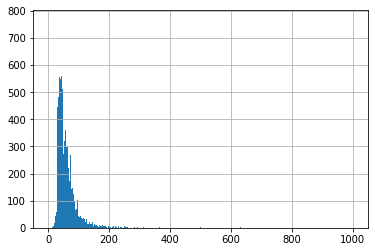

In [54]:
real_estate_data['total_area'].hist(bins = 1000, range = (0,1000))

<AxesSubplot:>

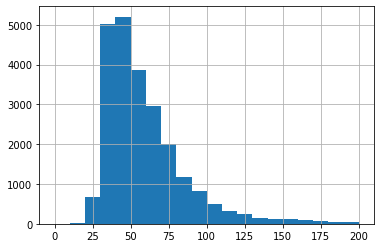

In [55]:
real_estate_data['total_area'].hist(bins = 20, range = (0,200))

In [56]:
real_estate_data['total_area'].describe()

count    23649.000000
mean        60.327350
std         35.661581
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

In [57]:
real_estate_data['total_area'].median()

52.0

Из гистограмм видно, что большая часть недвижимости - это квартиры от 30 до 80 кв метров. При это среднее и медиана - 60 и 52 кв.м соответственно. А также есть выбросы: 12 кв метров - минимум и 900 кв. м - максимум.

2) Изучим цену на недвижимость.

In [58]:
real_estate_data['cost_per_square_metre'].describe()

count    2.364900e+04
mean     9.943231e+04
std      5.033900e+04
min      1.118349e+02
25%      7.661290e+04
50%      9.500000e+04
75%      1.142771e+05
max      1.907500e+06
Name: cost_per_square_metre, dtype: float64

<AxesSubplot:>

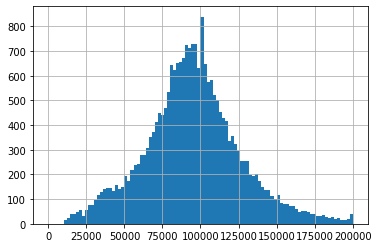

In [59]:
real_estate_data['cost_per_square_metre'].hist(bins = 100, range = (0,200000))

<AxesSubplot:>

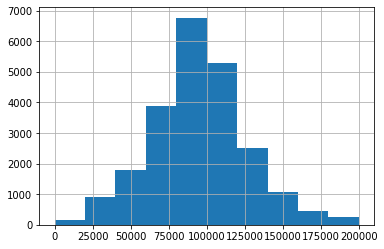

In [60]:
real_estate_data['cost_per_square_metre'].hist(bins = 10, range = (0,200000))

Из гистограммы видно, что больше всего в выборке квартир по стоимости за кв метр от 55 до 120 тысяч.

3) Посмотрим на число комнат.

In [61]:
real_estate_data['rooms'].describe()

count    23649.000000
mean         2.070066
std          1.078626
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

<AxesSubplot:>

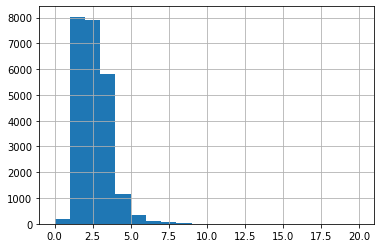

In [62]:
real_estate_data['rooms'].hist(bins=20, range = (0,20))

<AxesSubplot:>

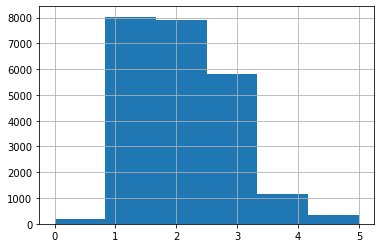

In [63]:
real_estate_data['rooms'].hist(bins=6, range = (0,5))

Из гистограммы можно сделать вывод - больше всего в выборке 1-3-комнатных квартир, еще какое-то количество 4-7-комнатных и совсем не нулевое количество квартир с 0 комнат (это скорее всего опен-спейсы, апартаменты и студии). А также есть совсем выбросы - 8-9 и даже 19 комнат.

4) Теперь посмотрим на высоту потолков.

In [64]:
real_estate_data['ceiling_height'].describe()

count    23649.000000
mean         2.744710
std          0.995595
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max        100.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

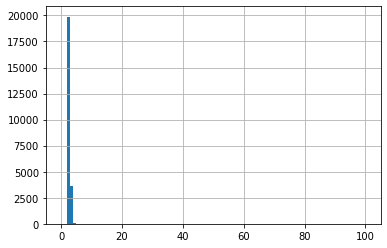

In [65]:
real_estate_data['ceiling_height'].hist(bins=100, range = (0,100))

<AxesSubplot:>

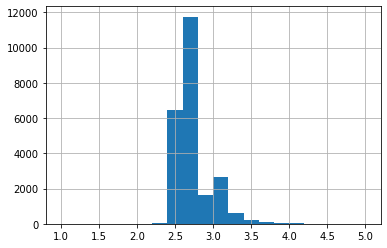

In [66]:
real_estate_data['ceiling_height'].hist(bins=20, range = (1,5))

Из гистограммы видно, что больше всего в выборке квартир с высотой потолков условно "стандартной" величины - приблизительно  2,5-2,8 и 3-3,2 метра других вариантов высот очень мало, хотя опять же - есть выбросы, вроде 1 метра и 100 метров.

In [67]:
real_estate_data.loc[real_estate_data['ceiling_height'] == 100]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,cost_per_square_metre,first_day_exposition_weekday,first_day_exposition_month,first_day_exposition_year,floor_category,living/total_area,kitchen/total_area
22869,0,15000000.0,25.0,2018-07-25,1,100.0,5.0,14.0,5,True,...,3.0,30.0,19.0,600000.0,2,7,2018,последний,0.56,0.44


In [68]:
real_estate_data.loc[real_estate_data['ceiling_height'] == 1]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,cost_per_square_metre,first_day_exposition_weekday,first_day_exposition_month,first_day_exposition_year,floor_category,living/total_area,kitchen/total_area
22590,16,6000000.0,55.0,2018-10-31,2,1.0,12.0,32.4,7,False,...,2.0,289.0,13.0,109090.909091,2,10,2018,другой,0.589091,0.181818


### Изучим время продажи квартиры. Посчитаем среднее и медиану. Выясним сколько обычно занимает продажа недвижимости.

In [69]:
real_estate_data['days_exposition'].describe()

count    20469.000000
mean       180.759441
std        219.781470
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее значение времени продажи недвижимости - 180 дней.

<AxesSubplot:>

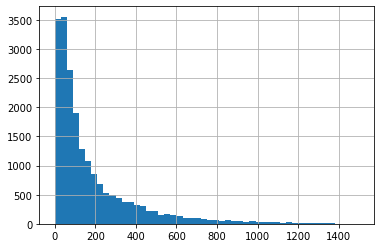

In [70]:
real_estate_data['days_exposition'].hist(bins = 50, range = (0,1500))

<AxesSubplot:>

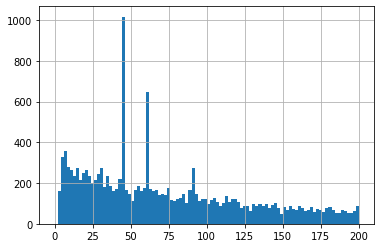

In [71]:
real_estate_data['days_exposition'].hist(bins = 100, range = (0,200))

<AxesSubplot:>

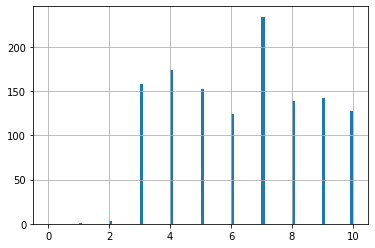

In [72]:
real_estate_data['days_exposition'].hist(bins = 100, range = (0,10))

<AxesSubplot:>

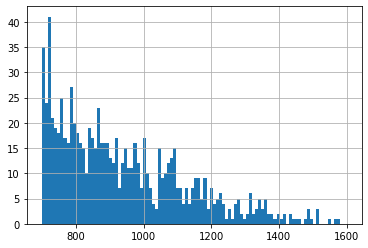

In [73]:
real_estate_data['days_exposition'].hist(bins = 100, range = (700,1600))

In [74]:
real_estate_data['days_exposition'].median()

95.0

Медианное значение времени продажи недвижимости - 180 дней.

Большинство квартир продается приблизительно в первые 100 дней (~ 3 месяца) после публикации объявления на сайте. При этом первые 2 дня обычно почти совсем ничего не продается, а на третий - появляется довольно ощутимое кол-во снятых с публикации объявлений (это кажется логичным, потому что обычно люди все-таки не покупают квартиру онлайн, а звонят, договариваются о просмотре - а это занимает время. Большинство квартир уходит в первые три месяца, также потом еще до примерно года - полутора лет квартиры все еще неплохо стабильно продаются, хотя уже и не такой большое кол-во (предположительно за это время продавцы меняют что-то в своем объявлении - снижают цену, меняют описание и фотографии - и в итоге кто-то покупает их недвижимость). И уже после полутора-двух лет с момента публикации - квартиры почти совсем не продаются (предполагаю, что с этими квартирами явно что-то не так).

### Уберем редкие и выбивающиеся значения.

Посмотрим какие столбцы в целом есть в таблице.

In [75]:
real_estate_data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'cost_per_square_metre',
       'first_day_exposition_weekday', 'first_day_exposition_month',
       'first_day_exposition_year', 'floor_category', 'living/total_area',
       'kitchen/total_area'],
      dtype='object')

Построим гистограммы по всем интересующим нас столбцам и найдем выбивающиеся значения.

array([[<AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>],
       [<AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'kitchen_area'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>,
        <AxesSubplot:title={'center':'cost_per_square_metre'}>]],
      dtype=object)

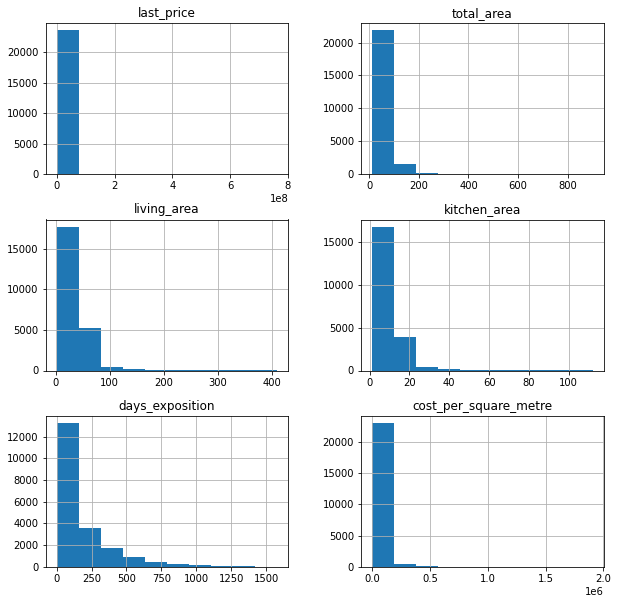

In [76]:
real_estate_data.hist(['last_price', 'total_area', 'living_area', 'kitchen_area', 'days_exposition', 'cost_per_square_metre'], figsize=(10, 10))

Добавим range к каждому из столбцов (от Q1-3*IQR до Q3+3*IQR), чтобы посмотреть на данные поближе.

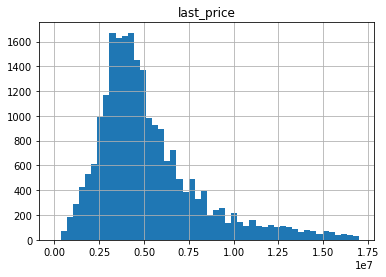

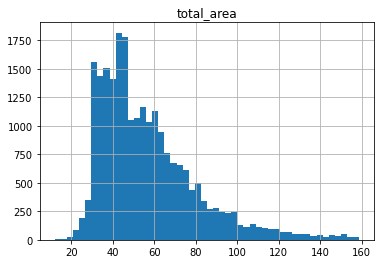

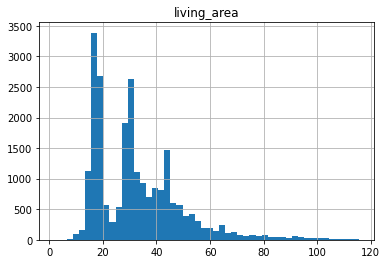

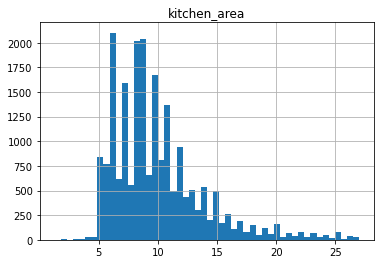

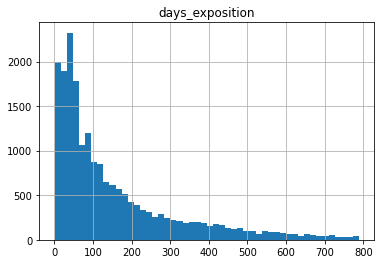

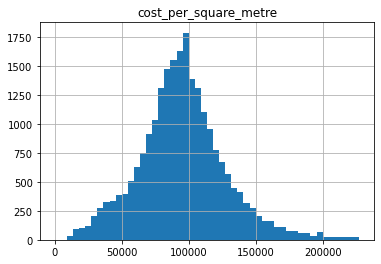

In [77]:
for i in ['last_price', 'total_area', 'living_area', 'kitchen_area', 'days_exposition', 'cost_per_square_metre']:
    IQR = real_estate_data[i].quantile(.75) - real_estate_data[i].quantile(.25)
    Q1 = real_estate_data[i].quantile(.25)
    Q3 = real_estate_data[i].quantile(.75)
    minimum = Q1 - 3*IQR
    maximum = Q3 + 3*IQR
    plt.figure()
    plt.title(i)
    real_estate_data[i].hist(bins = 50, range = ((max(minimum, real_estate_data[i].min())), (min(maximum, real_estate_data[i].max()))))

Посмотрим где заканчивается расстояние Q1-3*IQR до Q3+3*IQR=, чтобы понять выбросы ли остальные значения или нет.

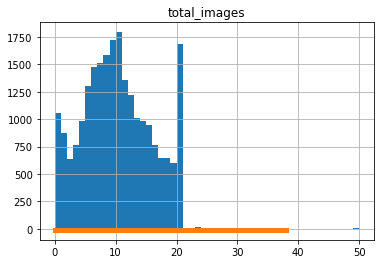

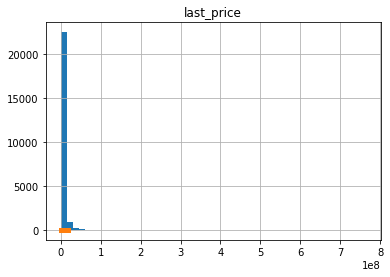

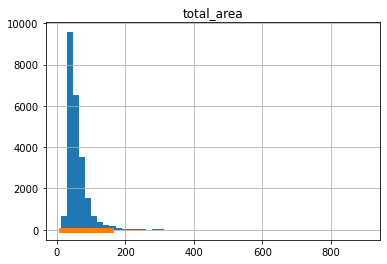

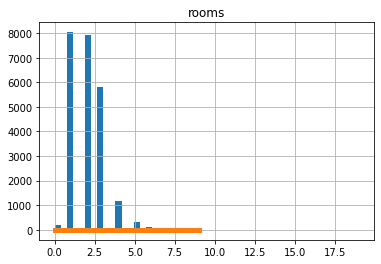

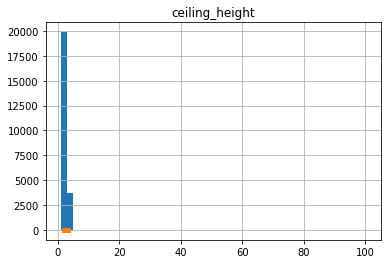

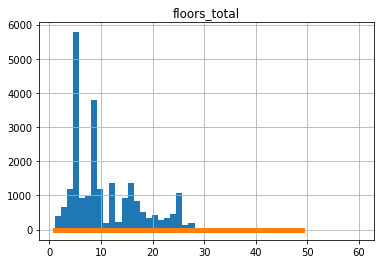

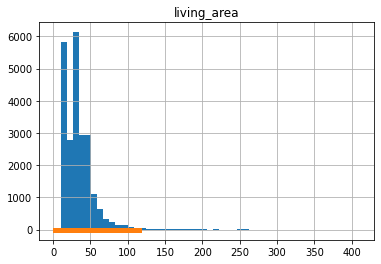

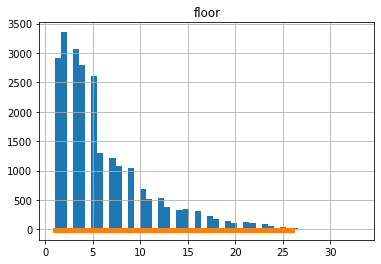

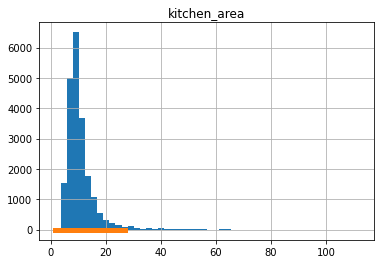

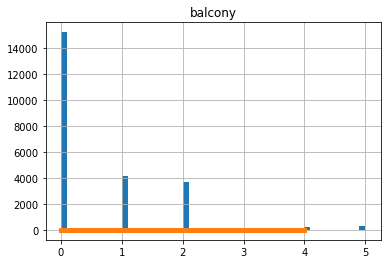

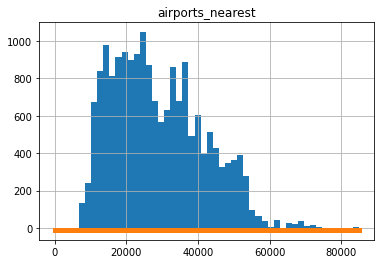

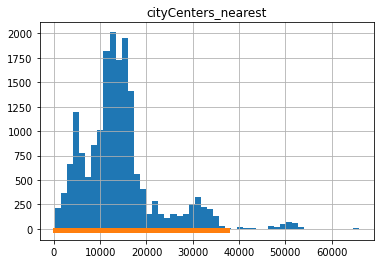

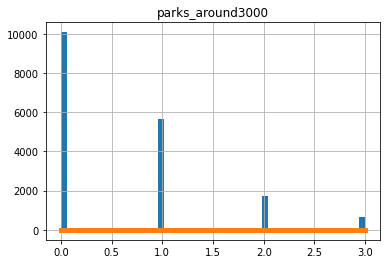

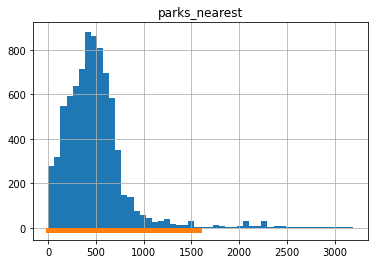

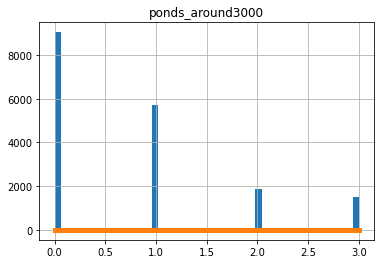

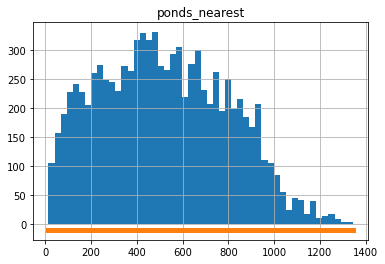

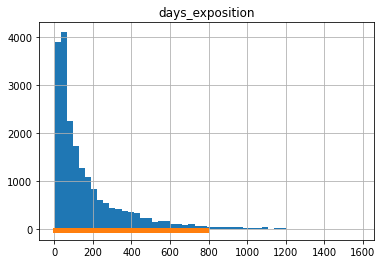

In [78]:
for i in ['total_images', 'last_price', 'total_area','rooms', 'ceiling_height', 'floors_total', 'living_area',
          'floor','kitchen_area', 'balcony', 'airports_nearest', 'cityCenters_nearest','parks_around3000',
          'parks_nearest', 'ponds_around3000','ponds_nearest', 'days_exposition']:
    IQR = real_estate_data[i].quantile(.75) - real_estate_data[i].quantile(.25)
    Q1 = real_estate_data[i].quantile(.25)
    Q3 = real_estate_data[i].quantile(.75)
    minimum = Q1 - 3*IQR
    maximum = Q3 + 3*IQR
    plt.figure()
    plt.title(i)
    real_estate_data[i].hist(bins = 50)
#     plt.plot([max(minimum, real_estate_data[i].min()), max(minimum, real_estate_data[i].min())], [0, 1000])
    plt.plot([max(minimum, real_estate_data[i].min()), min(maximum, real_estate_data[i].max())], [-10, -10], linewidth=5)
#     plt.plot([min(maximum, real_estate_data[i].max()), min(maximum, real_estate_data[i].max())], [0, 1000])
#     plt.plot([Q1, Q1], [0, 1000])
#     plt.plot([Q3, Q3], [0, 1000])
#     , range = ((max(minimum, real_estate_data[i].min())), (min(maximum, real_estate_data[i].max())))
    

На гистограммах 'total_images', 'rooms','floors_total' большая часть данных находится в пределах значений от Q1-3IQR до Q3+3IQR, поэтому у этих трех столбцов я бы удалила все выбросы.

Посмотрим на них поближе.

In [79]:
real_estate_data.loc[real_estate_data['total_images'] > 38]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,cost_per_square_metre,first_day_exposition_weekday,first_day_exposition_month,first_day_exposition_year,floor_category,living/total_area,kitchen/total_area
1058,39,1900000.0,63.0,2017-09-29,3,2.60,5.0,44.2,5,False,...,NaN,NaN,106.0,30158.730159,4,9,2017,последний,0.701587,0.100000
9778,50,11000000.0,87.0,2017-10-25,2,2.75,25.0,32.5,11,False,...,0.0,NaN,3.0,126436.781609,2,10,2017,другой,0.373563,0.356322
12667,50,20500000.0,76.0,2017-12-10,3,2.75,20.0,47.0,16,False,...,0.0,NaN,5.0,269736.842105,6,12,2017,другой,0.618421,0.381579
15157,42,17998000.0,138.6,2017-09-27,4,2.70,18.0,93.1,17,False,...,0.0,NaN,172.0,129855.699856,2,9,2017,другой,0.671717,0.115440
17396,50,14500000.0,119.7,2017-12-02,4,4.00,4.0,87.5,3,False,...,2.0,617.0,106.0,121136.173768,5,12,2017,другой,0.730994,0.112782


Все значения, где кол-во изображений больше 38, мы можем смело удалить из статистики, тк таких значений всего 5.

In [80]:
real_estate_data.loc[real_estate_data['rooms'] > 9]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,cost_per_square_metre,first_day_exposition_weekday,first_day_exposition_month,first_day_exposition_year,floor_category,living/total_area,kitchen/total_area
648,3,17500000.0,183.7,2018-07-01,11,3.40,7.0,138.8,7,False,...,0.0,NaN,NaN,95264.017420,6,7,2018,последний,0.755580,0.072401
866,5,25000000.0,363.0,2017-12-23,14,3.16,5.0,222.0,4,False,...,2.0,435.0,418.0,68870.523416,5,12,2017,другой,0.611570,0.045730
4149,6,23000000.0,272.6,2018-01-11,10,3.14,7.0,145.9,7,False,...,1.0,531.0,NaN,84372.707263,3,1,2018,последний,0.535216,0.068966
5358,20,65000000.0,590.0,2019-02-14,15,3.50,6.0,409.0,3,False,...,0.0,NaN,14.0,110169.491525,3,2,2019,другой,0.693220,0.169492
9688,8,33000000.0,194.1,2017-02-07,11,3.43,5.0,129.0,2,False,...,2.0,66.0,813.0,170015.455951,1,2,2017,другой,0.664606,0.061309
14498,6,32250000.0,374.6,2018-06-09,19,2.60,5.0,264.5,2,False,...,2.0,548.0,114.0,86091.831287,5,6,2018,другой,0.706086,0.073679
18119,4,15500000.0,216.1,2016-07-04,10,3.15,5.0,161.4,2,False,...,0.0,NaN,11.0,71726.052753,0,7,2016,другой,0.746876,0.091624
18848,6,28500000.0,270.0,2015-03-02,16,3.00,4.0,180.0,4,False,...,0.0,NaN,1365.0,105555.555556,0,3,2015,последний,0.666667,0.048148
18891,11,40000000.0,290.0,2016-06-21,10,3.50,6.0,189.4,6,False,...,1.0,227.0,77.0,137931.034483,1,6,2016,последний,0.653103,0.103448
19540,8,420000000.0,900.0,2017-12-06,12,2.80,25.0,409.7,25,False,...,2.0,318.0,106.0,466666.666667,2,12,2017,последний,0.455222,0.124444


Здесь тоже - больше 9 комнат всего у 11 значений из 23699, их также можно удалить как выбросы.

In [81]:
real_estate_data.loc[real_estate_data['floors_total'] > 48]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,cost_per_square_metre,first_day_exposition_weekday,first_day_exposition_month,first_day_exposition_year,floor_category,living/total_area,kitchen/total_area
2253,12,3800000.0,45.5,2018-06-28,2,2.88,60.0,27.4,4,False,...,3.0,614.0,166.0,83516.483516,3,6,2018,другой,0.602198,0.162637
16731,9,3978000.0,40.0,2018-09-24,1,2.65,52.0,10.5,18,False,...,0.0,NaN,45.0,99450.000000,0,9,2018,другой,0.262500,0.350000


Больше 48 этажей - всего 2 строки, удалим их.

Можно заметить, что все остальные гистограммы, рассмотренные выше, имеют довольно большое кол-во данных и за пределами Q1-3IQR - Q3+3IQR.

Теперь сохраним все значения, кроме тех, что мы решили отбросить, в чистый датасет cleaned_real_estate_data.

In [82]:
cleaned_real_estate_data = real_estate_data.loc[(real_estate_data['rooms'] <= 9) & (real_estate_data['floors_total'] <= 48) & (real_estate_data['total_images'] <= 38)]
cleaned_real_estate_data = pd.DataFrame(cleaned_real_estate_data)

Дальше будем работать уже с очищенными данными.

Здесь не совсем поняла честно говоря: 

1) Boxplot ты советуешь построить здесь только для некоторых столбцов просто потому, что они так будут нагляднее выглядеть?

2)Ты имеешь ввиду, что вместо разброса от Q1-3IQR до Q3+3IQR надо было использовать разброс от Q1-1.5IQR до Q3+1.5IQR (этот разброс (Q1-3IQR до Q3+3IQR) я, кстати взяла из советов в нашем Slack - чатике :) 

### Выясним какие факторы больше всего влияют на стоимость квартиры. Изучим зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучим зависимость от даты размещения: дня недели, месяца и года. Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим населённые пункты с самой высокой и низкой стоимостью жилья. 

#### Изучим зависит ли цена квадратного метра квартиры от площади квартиры.

<AxesSubplot:xlabel='total_area', ylabel='cost_per_square_metre'>

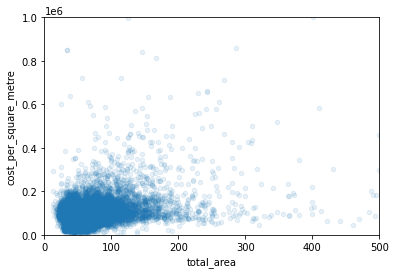

In [83]:
cleaned_real_estate_data.plot.scatter(x = 'total_area', y = 'cost_per_square_metre', xlim = (0, 500), ylim = (0, 1e6), alpha = 0.1)

Из графика видно, что зависимость между ценой за кв метр и площадью квартиры есть (хоть она и не линейная). 
Единственное, что здесь можно сказать, это то, что у больших квартир не бывает очень маленькой цены за кв метр а у маленьких - бывает.

Теперь посмотрим есть ли зависимость между ценой за кв метр и числом комнат.

<AxesSubplot:xlabel='rooms', ylabel='cost_per_square_metre'>

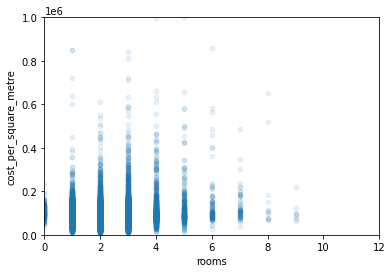

In [84]:
cleaned_real_estate_data.plot.scatter(x = 'rooms', y = 'cost_per_square_metre', xlim = (0, 12), ylim = (0, 1e6), alpha = 0.1)

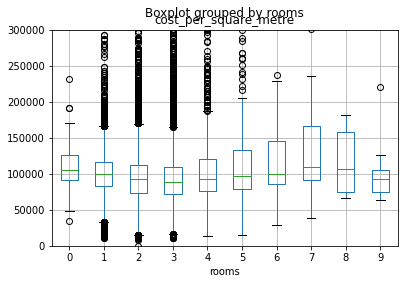

In [85]:
cleaned_real_estate_data.boxplot(column = 'cost_per_square_metre', by = 'rooms')
plt.ylim((0, 3e5))
plt.show()

Из графиков видно, что медианное значение в зависимости от кол-ва комнат "плавает" (снижается от 0 до 3 комнат, а потом опять начинает расти до 7 комнат). Наиболее высокие цены за кв метр в 0 и в 7 комнатных квартирах, самые низкие в 3 и 9).

Теперь посмотрим есть ли зависимость между ценой за кв метр и категорией этажа.

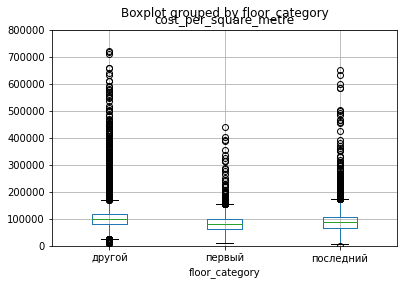

In [86]:
cleaned_real_estate_data.boxplot(column= 'cost_per_square_metre', by = 'floor_category')
plt.ylim((0, 8e5))
plt.show()

Из графика видно, что квартиры на первом этаже обычно стоят меньше, чем на последнем, а те, что на последнем - обычно стоят еще немного меньше, чем квартиры на любых других этажах.

Теперь посмотрим есть ли зависимость между ценой за кв метр и удалённостью от центра.

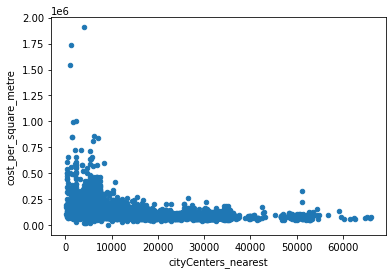

In [87]:
cleaned_real_estate_data.plot.scatter(x = 'cityCenters_nearest', y = 'cost_per_square_metre')
plt.show()

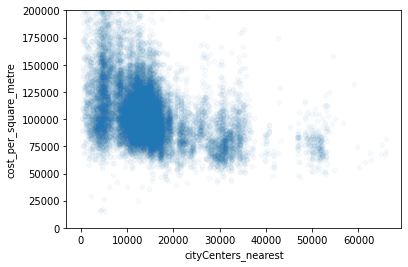

In [88]:
cleaned_real_estate_data.plot.scatter(x = 'cityCenters_nearest', y = 'cost_per_square_metre', ylim = (0, 0.2e6), alpha = 0.03)
plt.show()

Зависимость есть, но не однозначная - то есть квартиры ближе к центру стоят дороже, чем в пригороде (они могут стоить в десять раз больше, чем в пригороде, например), но при этом можно найти и квартиры в центре по цене близкой с квартирами в пригороде, но, вероятнее всего, это будет совсем другая по параметрам квартира.
Четкого перелома цены не видно, но он происходит где-то в районе 10 км от центра.

Также изучим зависимость от даты размещения: дня недели, месяца и года.

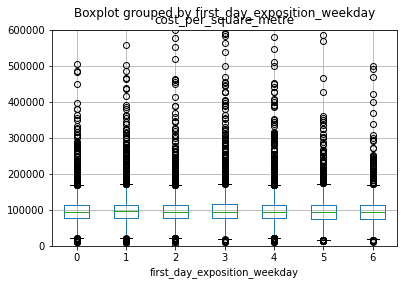

In [89]:
cleaned_real_estate_data.boxplot(column= 'cost_per_square_metre', by = 'first_day_exposition_weekday')
plt.ylim((0, 6e5))
plt.show()

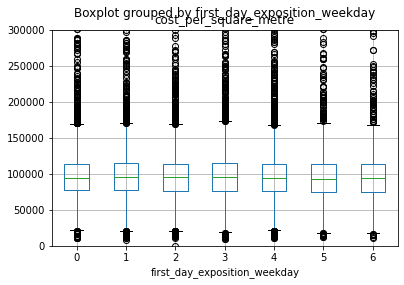

In [90]:
cleaned_real_estate_data.boxplot(column= 'cost_per_square_metre', by = 'first_day_exposition_weekday')
plt.ylim((0, 3e5))
plt.show()

Из графиков не видно никакой черкой зависимости от дня недели - они все приблизительно одинаковые по медианному значению цены.

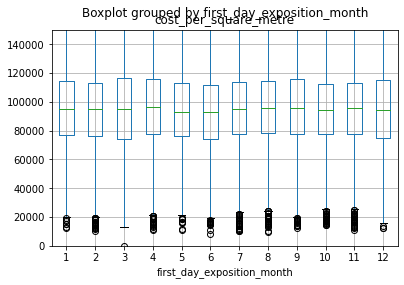

In [91]:
cleaned_real_estate_data.boxplot(column= 'cost_per_square_metre', by = 'first_day_exposition_month')
plt.ylim((0, 1.5e5))
plt.show()

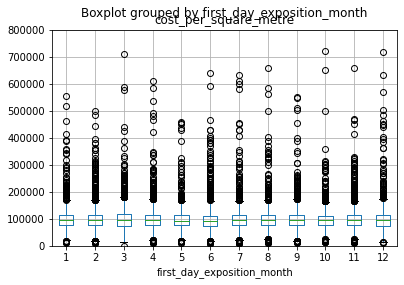

In [92]:
cleaned_real_estate_data.boxplot(column= 'cost_per_square_metre', by = 'first_day_exposition_month')
plt.ylim((0, 8e5))
plt.show()

Из графика зависимости цены за кв метр от месяца покупки квартиры видно, что самое низкое среднее - в мае и июне, а самое высокое - в апреле.

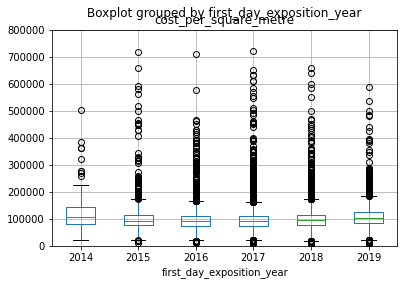

In [93]:
cleaned_real_estate_data.boxplot(column= 'cost_per_square_metre', by = 'first_day_exposition_year')
plt.ylim((0, 8e5))
plt.show()

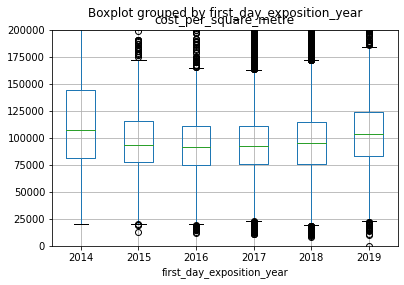

In [94]:
cleaned_real_estate_data.boxplot(column= 'cost_per_square_metre', by = 'first_day_exposition_year')
plt.ylim((0, 2e5))
plt.show()

Из графиков видно, что медианная стоимость жилья за кв метр была наиболее высокой в 2014 году, затем она снижалась до 2016 года и с 2107 снова начала подниматься, но к 2019 так и не достигла цен в 2014.

Теперь посмотрим на численную оценку влияния различных параметров на цену за кв метр, для этого построим матрицу корреляций.

In [95]:
cleaned_real_estate_data_corr_columns = cleaned_real_estate_data[['cost_per_square_metre','total_area','rooms', 'floor_category', 'cityCenters_nearest', 'first_day_exposition_weekday', 'first_day_exposition_month', 'first_day_exposition_year']]
corr = cleaned_real_estate_data_corr_columns.corr()
corr

,cost_per_square_metre,total_area,rooms,cityCenters_nearest,first_day_exposition_weekday,first_day_exposition_month,first_day_exposition_year
cost_per_square_metre,1.000000,0.302286,0.053618,-0.318558,-0.007182,-0.002604,0.009139
total_area,0.302286,1.000000,0.755431,-0.233565,-0.005133,0.004519,-0.080745
rooms,0.053618,0.755431,1.000000,-0.183690,-0.005286,-0.003511,-0.054382
cityCenters_nearest,-0.318558,-0.233565,-0.183690,1.000000,0.008615,-0.009195,0.029884
first_day_exposition_weekday,-0.007182,-0.005133,-0.005286,0.008615,1.000000,0.011055,-0.004110
first_day_exposition_month,-0.002604,0.004519,-0.003511,-0.009195,0.011055,1.000000,-0.271359
first_day_exposition_year,0.009139,-0.080745,-0.054382,0.029884,-0.004110,-0.271359,1.000000


<AxesSubplot:>

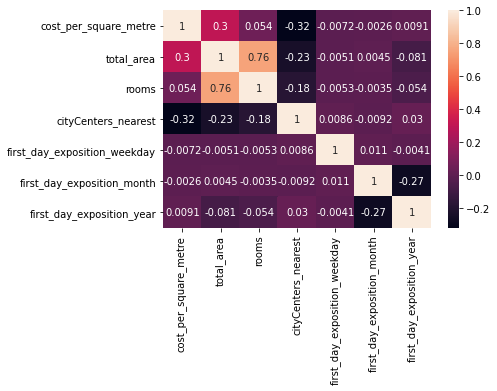

In [139]:
sns.heatmap(corr, annot=True)

Из первой строки видно, что больше всего из рассмотренных параметров цена за кв метр коррелирует с площадью квартиры и с расстоянием до центра (но здесь корреляция отрицательная, то есть чем больше расстояние - тем меньше цена), что совпадает с выводами сделанными выше.

#### Найдем 10 населённых пунктов с наибольшим числом объявлений и посчитаем среднюю цену квадратного метра в этих населённых пунктах.

In [140]:
cleaned_real_estate_data['locality_name'].value_counts().head(10)

Санкт-Петербург      15704
посёлок Мурино         522
посёлок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

In [98]:
localities_sorted_by_count = (cleaned_real_estate_data
 .groupby(by = 'locality_name')
 .agg(['mean', 'count'])
 .sort_values(by = ('cost_per_square_metre', 'count'), ascending=False)['cost_per_square_metre']
)

localities_sorted_by_count.head(10)

,mean,count
locality_name,,
Санкт-Петербург,114823.177775,15704
посёлок Мурино,85752.189195,522
посёлок Шушары,78677.364217,440
Всеволожск,68654.473986,398
Пушкин,103125.819291,369
Колпино,75424.579098,338
посёлок Парголово,90175.913458,327
Гатчина,68746.146763,307
деревня Кудрово,92473.547576,299


#### Выделим населённые пункты с самой высокой и низкой стоимостью жилья. 

In [99]:
localities_mean_price = (cleaned_real_estate_data
 .groupby(by = 'locality_name').mean()['cost_per_square_metre']
                             )
locality_with_min_cost = localities_mean_price.idxmin()
locality_with_max_cost = localities_mean_price.idxmax()
print(localities_sorted_by_count.loc[locality_with_min_cost])
print(localities_sorted_by_count.loc[locality_with_max_cost])

mean     11206.221198
count        3.000000
Name: деревня Старополье, dtype: float64
mean     121616.221359
count         2.000000
Name: посёлок Лисий Нос, dtype: float64


Самая высокая стоимость жилья в посёлке Лисий Нос - там всего две квартиры, но они самые дорогие. И самая низкая - в деревне Ставрополье, там тоже всего 3 квартиры по такой маленькой цене.

### Выделим квартиры в Санкт-Петербурге и выясним какая область входит в центр. Создадим столбец с расстоянием до центра в километрах. Посчитаем среднюю цену для каждого километра.

Посмотрим уникальные значения столбца 'locality_name', чтобы убедиться, что "Санкт-Петербург" не пишется 10-ю различными способами.

In [101]:
cleaned_real_estate_data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Выделим квартиры в Санкт-Петербурге и сохраним их в отдельную таблицу.

In [102]:
cleaned_real_estate_data_peterburg = cleaned_real_estate_data.loc[cleaned_real_estate_data['locality_name'] == 'Санкт-Петербург']
cleaned_real_estate_data_peterburg

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,cost_per_square_metre,first_day_exposition_weekday,first_day_exposition_month,first_day_exposition_year,floor_category,living/total_area,kitchen/total_area
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,2.0,755.0,NaN,120370.370370,3,3,2019,другой,0.472222,0.231481
2,10,5196000.0,56.00,2015-08-20,2,2.60,5.0,34.3,4,False,...,2.0,574.0,558.0,92785.714286,3,8,2015,другой,0.612500,0.148214
3,0,64900000.0,159.00,2015-07-24,3,2.60,14.0,45.0,9,False,...,3.0,234.0,424.0,408176.100629,4,7,2015,другой,0.283019,NaN
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,1.0,48.0,121.0,100000.000000,1,6,2018,другой,0.320000,0.410000
7,5,7915000.0,71.60,2019-04-18,2,2.75,24.0,30.5,22,False,...,0.0,NaN,NaN,110544.692737,3,4,2019,другой,0.425978,0.263966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,3550000.0,35.30,2018-02-28,1,2.86,15.0,16.3,4,False,...,2.0,652.0,29.0,100566.572238,2,2,2018,другой,0.461756,0.257790
23690,3,5500000.0,52.00,2018-07-19,2,2.60,5.0,31.0,2,False,...,0.0,NaN,15.0,105769.230769,3,7,2018,другой,0.596154,0.115385
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25.0,40.3,7,False,...,1.0,806.0,519.0,129903.978052,3,10,2016,другой,0.552812,0.145405
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,3.0,381.0,NaN,72490.845228,1,3,2017,другой,0.547792,0.103356


Создадим новый столбец с расстоянием до центра в км и округлим его до целого значения. Сейчас у нас есть столбец cityCenters_nearest - с расстоянием до центра в метрах.

In [103]:
cleaned_real_estate_data_peterburg['cityCenters_nearest_km'] = (cleaned_real_estate_data_peterburg['cityCenters_nearest'] / 1000).round()
cleaned_real_estate_data_peterburg = pd.DataFrame(cleaned_real_estate_data_peterburg)
cleaned_real_estate_data_peterburg.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,cost_per_square_metre,first_day_exposition_weekday,first_day_exposition_month,first_day_exposition_year,floor_category,living/total_area,kitchen/total_area,cityCenters_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,755.0,NaN,120370.370370,3,3,2019,другой,0.472222,0.231481,16.0
2,10,5196000.0,56.0,2015-08-20,2,2.60,5.0,34.3,4,False,...,574.0,558.0,92785.714286,3,8,2015,другой,0.612500,0.148214,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.60,14.0,45.0,9,False,...,234.0,424.0,408176.100629,4,7,2015,другой,0.283019,NaN,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,48.0,121.0,100000.000000,1,6,2018,другой,0.320000,0.410000,8.0
7,5,7915000.0,71.6,2019-04-18,2,2.75,24.0,30.5,22,False,...,NaN,NaN,110544.692737,3,4,2019,другой,0.425978,0.263966,12.0


Посчитаем среднюю цену для каждого километра. 

In [104]:
cleaned_real_estate_data_peterburg['cityCenters_nearest_km'].unique()

array([16., 14.,  7.,  8., 12., 15., 11., 13., 10.,  2.,  4., 17.,  5.,
       nan,  9.,  3.,  6., 21., 18.,  1., 24., 26., 22., 20., 23., 25.,
        0., 27., 28., 19., 29.])

In [105]:
cleaned_real_estate_data_peterburg['cityCenters_nearest_km'].value_counts()

12.0    1602
15.0    1568
13.0    1456
14.0    1279
16.0    1264
11.0    1178
5.0      917
17.0     883
10.0     719
4.0      686
6.0      618
8.0      595
9.0      593
7.0      420
3.0      349
2.0      308
18.0     261
22.0     202
1.0      191
19.0     157
21.0     117
23.0      85
26.0      53
20.0      48
0.0       27
24.0      26
25.0      26
28.0       7
29.0       6
27.0       2
Name: cityCenters_nearest_km, dtype: int64

In [106]:
mean_cost_in_each_km = cleaned_real_estate_data_peterburg.groupby( by = 'cityCenters_nearest_km').mean()
mean_cost_in_each_km['last_price']

cityCenters_nearest_km
0.0     3.144912e+07
1.0     2.114498e+07
2.0     1.776370e+07
3.0     1.110832e+07
4.0     1.325451e+07
5.0     1.441515e+07
6.0     1.533842e+07
7.0     1.477515e+07
8.0     9.243289e+06
9.0     6.950659e+06
10.0    6.504119e+06
11.0    6.250815e+06
12.0    5.807001e+06
13.0    6.084587e+06
14.0    5.629101e+06
15.0    5.884751e+06
16.0    5.361163e+06
17.0    5.292395e+06
18.0    5.091331e+06
19.0    5.037675e+06
20.0    5.869204e+06
21.0    5.493469e+06
22.0    5.415524e+06
23.0    4.985376e+06
24.0    3.854430e+06
25.0    4.052840e+06
26.0    3.973013e+06
27.0    8.300000e+06
28.0    5.026429e+06
29.0    4.236667e+06
Name: last_price, dtype: float64

Построим график зависимости цены от удалённости от центра. Определим границу, где график сильно меняется — это будет центральная зона.

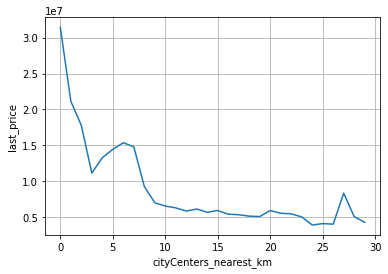

In [107]:
plt.plot(mean_cost_in_each_km.index, mean_cost_in_each_km['last_price'])
plt.xlabel('cityCenters_nearest_km')
plt.ylabel('last_price')
plt.grid(True)

(0.0, 10.0)

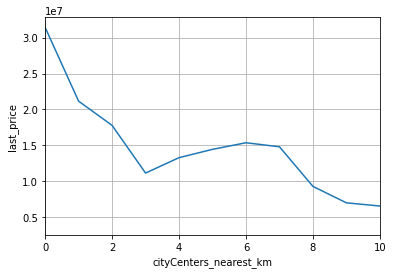

In [108]:
plt.plot(mean_cost_in_each_km.index, mean_cost_in_each_km['last_price'])
plt.xlabel('cityCenters_nearest_km')
plt.ylabel('last_price')
plt.grid(True)
plt.xlim(0, 10)

(0.0, 10.0)

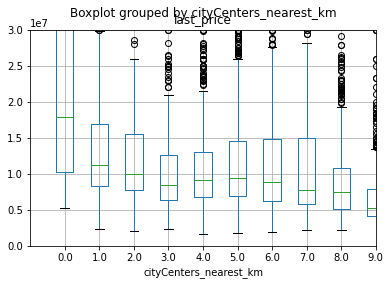

In [109]:
cleaned_real_estate_data_peterburg.boxplot(column= 'last_price', by = 'cityCenters_nearest_km')
plt.ylim(0, 3e7)
plt.xlim(0, 10)


Из графиков видно, что есть перелом на 3-ех километрах, но в котором цена опять начинает расти, а потом где-то в районе 9 км начинает мелко колебаться. Но, как мне кажется, первый перелом (на трех км) - скорее похож на какую-то аномалию - особенно дорогой район, который находится примерно на этом расстоянии от центра, например. А второй перелом, где меняется скорее характер графика - переход из сильно большой цены в какую-то уже не так сильно колеблющуюся - здесь по идее и должен заканчиваться центр. То есть центральная зона - это все квартиры, находящиеся от центра на расстоянии менше или равном 9 км.

### Выделим сегмент квартир в центре. Изучим на этой территории параметры: площадь, цена, число комнат, высота потолков. Выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

#### Выделим квартиры в центре.

In [110]:
cleaned_real_estate_data_centr = cleaned_real_estate_data_peterburg.loc[cleaned_real_estate_data_peterburg['cityCenters_nearest_km'] <= 9]
cleaned_real_estate_data_centr

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,cost_per_square_metre,first_day_exposition_weekday,first_day_exposition_month,first_day_exposition_year,floor_category,living/total_area,kitchen/total_area,cityCenters_nearest_km
3,0,64900000.0,159.00,2015-07-24,3,2.60,14.0,45.0,9,False,...,234.0,424.0,408176.100629,4,7,2015,другой,0.283019,NaN,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,48.0,121.0,100000.000000,1,6,2018,другой,0.320000,0.410000,8.0
24,8,6500000.0,97.20,2015-10-31,2,3.00,3.0,46.5,1,False,...,124.0,265.0,66872.427984,5,10,2015,первый,0.478395,0.201646,2.0
35,6,15500000.0,149.00,2017-06-26,5,2.60,5.0,104.0,4,False,...,779.0,644.0,104026.845638,0,6,2017,другой,0.697987,0.114094,4.0
51,7,45000000.0,161.00,2017-10-17,3,3.20,8.0,38.0,4,False,...,99.0,541.0,279503.105590,1,10,2017,другой,0.236025,0.310559,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23674,10,5950000.0,56.00,2019-03-05,3,3.00,8.0,32.1,3,False,...,303.0,NaN,106250.000000,1,3,2019,другой,0.573214,0.151786,9.0
23681,13,5250000.0,43.00,2018-05-11,2,2.50,5.0,29.0,2,False,...,660.0,80.0,122093.023256,4,5,2018,другой,0.674419,0.139535,7.0
23690,3,5500000.0,52.00,2018-07-19,2,2.60,5.0,31.0,2,False,...,NaN,15.0,105769.230769,3,7,2018,другой,0.596154,0.115385,6.0
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25.0,40.3,7,False,...,806.0,519.0,129903.978052,3,10,2016,другой,0.552812,0.145405,4.0


#### Проанализируем квартиры в центре и изучим следующие параметры: площадь, цена, число комнат, высота потолков.

In [111]:
cleaned_real_estate_data_centr['total_area'].describe()

count    4704.000000
mean       85.843163
std        54.586524
min        12.000000
25%        51.000000
50%        72.500000
75%       101.400000
max       631.200000
Name: total_area, dtype: float64

<AxesSubplot:>

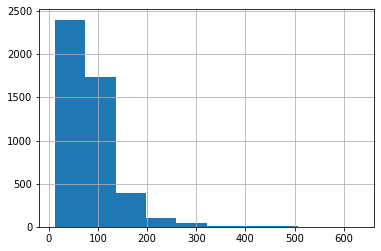

In [112]:
cleaned_real_estate_data_centr['total_area'].hist()

<AxesSubplot:>

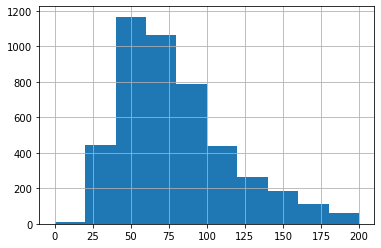

In [113]:
cleaned_real_estate_data_centr['total_area'].hist(range = (0,200))

In [114]:
cleaned_real_estate_data_centr['cost_per_square_metre'].describe()

count    4.704000e+03
mean     1.387099e+05
std      8.375502e+04
min      1.118349e+02
25%      9.915157e+04
50%      1.203924e+05
75%      1.496735e+05
max      1.907500e+06
Name: cost_per_square_metre, dtype: float64

<AxesSubplot:>

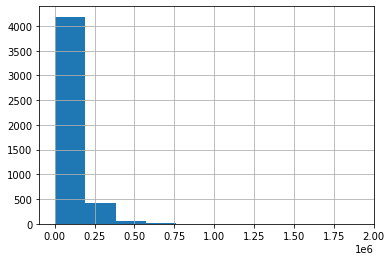

In [115]:
cleaned_real_estate_data_centr['cost_per_square_metre'].hist()

<AxesSubplot:>

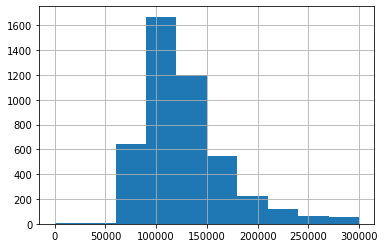

In [116]:
cleaned_real_estate_data_centr['cost_per_square_metre'].hist(range = (0, 3e5))

In [117]:
cleaned_real_estate_data_centr['rooms'].describe()

count    4704.000000
mean        2.648384
std         1.301664
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         9.000000
Name: rooms, dtype: float64

<AxesSubplot:>

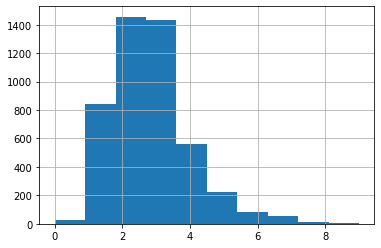

In [118]:
cleaned_real_estate_data_centr['rooms'].hist(bins = 10, range = (0,9))

In [119]:
cleaned_real_estate_data_centr['ceiling_height'].describe()

count    4704.000000
mean        2.980319
std         1.618981
min         2.000000
25%         2.680000
50%         3.000000
75%         3.120000
max       100.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

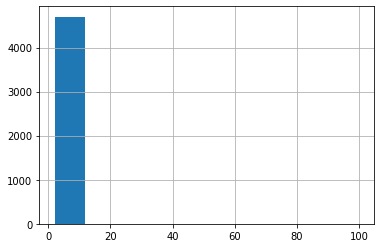

In [120]:
cleaned_real_estate_data_centr['ceiling_height'].hist()

<AxesSubplot:>

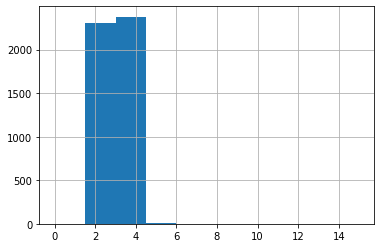

In [121]:
cleaned_real_estate_data_centr['ceiling_height'].hist(range = (0,15))

<AxesSubplot:>

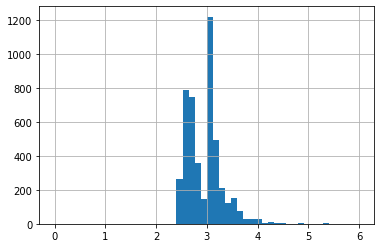

In [122]:
cleaned_real_estate_data_centr['ceiling_height'].hist(bins=50, range = (0,6))

Из изученных данных можно сделать вывод, что типичная квартира в центре это квартира площадью от 40 до 100 кв метров, с средней ценой от 60 до 170 тысяч за кв метр, с 1-3 комнатами и высотой потолков 2,5-3,5 метра (что отличается от типичной квартиры во всей выборке в целом только ценой).

#### Посмотрим на факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

1) Число комнат

<AxesSubplot:xlabel='rooms', ylabel='cost_per_square_metre'>

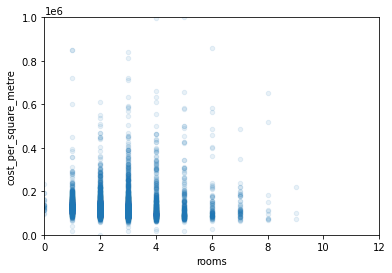

In [123]:
cleaned_real_estate_data_centr.plot.scatter(x = 'rooms', y = 'cost_per_square_metre', xlim = (0, 12), ylim = (0, 1e6), alpha = 0.1)


(0.0, 1000000.0)

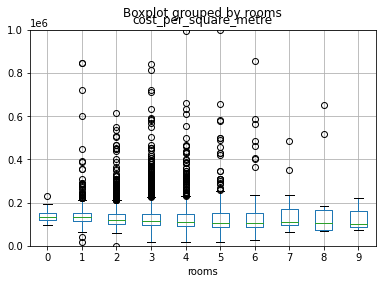

In [124]:
cleaned_real_estate_data_centr.boxplot(column = 'cost_per_square_metre', by = 'rooms')
plt.ylim((0, 1e6))

(0.0, 200000.0)

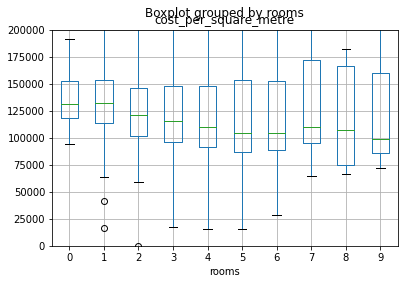

In [125]:
cleaned_real_estate_data_centr.boxplot(column = 'cost_per_square_metre', by = 'rooms')
plt.ylim((0, 2e5))

Из графиков видно, что цена за кв метр в 0-1 комнатных квартирах выше всего, потом она постепенно снижается и самой низкой становится в 6-ти комнатных квартирах, потом опять немного поднимается и снова опускается, становясь минимальной в 9-ти комнатных квартирах.

Здесь самая высокая цена в 0-комнатных квартира, также как и в общих данных, но посередине графики колеблются по-разному (в общих данных цена снижается от 0 до 3 комнат, а потом опять начинает расти до 7 комнат). Наиболее высокие цены за кв метр в общих данных в 0 и в 7 комнатных квартирах, самые низкие в 3 и 9).

2) Этаж

(0.0, 500000.0)

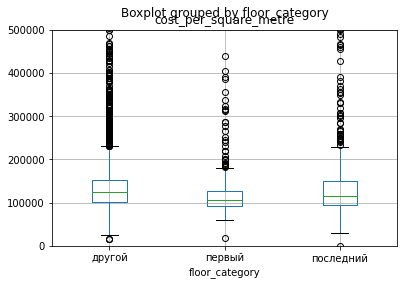

In [126]:
cleaned_real_estate_data_centr.boxplot(column= 'cost_per_square_metre', by = 'floor_category')
plt.ylim((0, 5e5))

Из графика видно, что квартиры на первом этаже обычно стоят меньше, чем на последнем, а те, что на последнем - обычно стоят меньше, чем квартиры на любых других этажах кроме первого и последнего. Здесь разница примерно такая же, как на графике по всем данным, которий мы строили раньше, только цены выше.

3) Удаленность от центра

<AxesSubplot:xlabel='cityCenters_nearest', ylabel='cost_per_square_metre'>

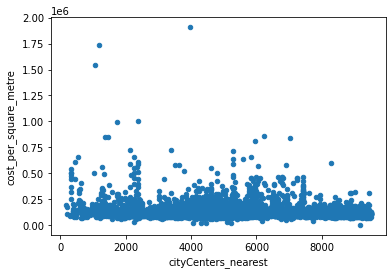

In [127]:
cleaned_real_estate_data_centr.plot.scatter(x = 'cityCenters_nearest', y = 'cost_per_square_metre')

<AxesSubplot:xlabel='cityCenters_nearest', ylabel='cost_per_square_metre'>

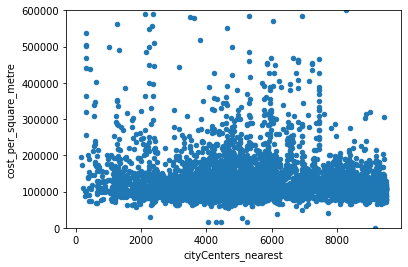

In [128]:
cleaned_real_estate_data_centr.plot.scatter(x = 'cityCenters_nearest', y = 'cost_per_square_metre', ylim = (0,6e5))

Сравним с ранее рассмотренным графиком.

<AxesSubplot:xlabel='cityCenters_nearest', ylabel='cost_per_square_metre'>

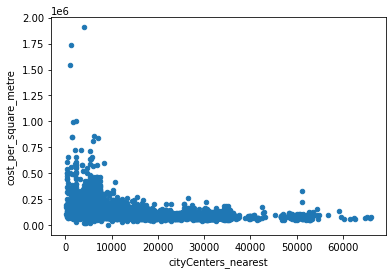

In [129]:
cleaned_real_estate_data.plot.scatter(x = 'cityCenters_nearest', y = 'cost_per_square_metre')

И посмотрим на центр поближе.

<AxesSubplot:xlabel='cityCenters_nearest', ylabel='cost_per_square_metre'>

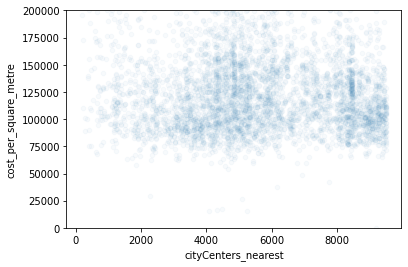

In [130]:
cleaned_real_estate_data_centr.plot.scatter(x = 'cityCenters_nearest', y = 'cost_per_square_metre', ylim = (0, 2e5), alpha = 0.03)

Если в рассмотренном ранее графике было видно, что цена в пределах до 10 км от центра довольно сильно выделяется, то когда мы смотрим отдельно только на центр - видно, что цена здесь уже не имеет каких-то четких тенденций - квартиры, которые стоят дороже, чем основная масса - есть, но они есть на протяжении всего графика, то есть особо не зависят от расстояния.

4) Дата размещения объявления

Посмотрим на день размещения объявления.

(0.0, 800000.0)

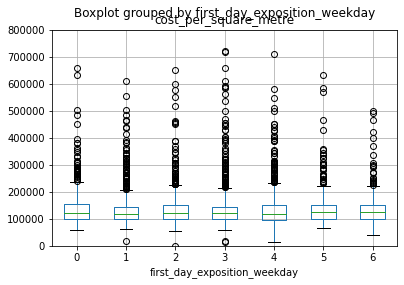

In [131]:
cleaned_real_estate_data_centr.boxplot(column= 'cost_per_square_metre', by = 'first_day_exposition_weekday')
plt.ylim((0, 8e5))

(0.0, 400000.0)

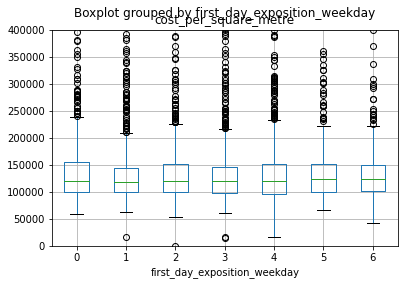

In [132]:
cleaned_real_estate_data_centr.boxplot(column= 'cost_per_square_metre', by = 'first_day_exposition_weekday')
plt.ylim((0, 4e5))

Из графиков не видно никакой черкой зависимости от дня недели (также, как это было в общем графике).

Теперь посмотрим на месяц размещения объявления.

(0.0, 200000.0)

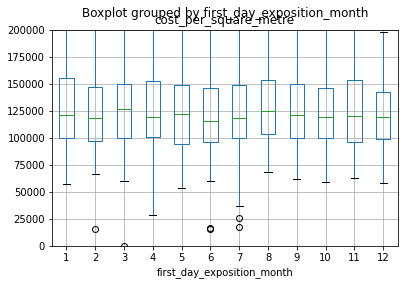

In [133]:
cleaned_real_estate_data_centr.boxplot(column= 'cost_per_square_metre', by = 'first_day_exposition_month')
plt.ylim((0, 2e5))

Из графика зависимости цены за кв метр от месяца покупки квартиры видно, что самое низкое медианное значеие выделяется - в июне (также как в графике по всем квартирам (там было в мае и июне), а самое высокое - в марте (а в общем графике было в апреле).

И последним посмотрим на год размещения объявления.

<AxesSubplot:title={'center':'cost_per_square_metre'}, xlabel='first_day_exposition_year'>

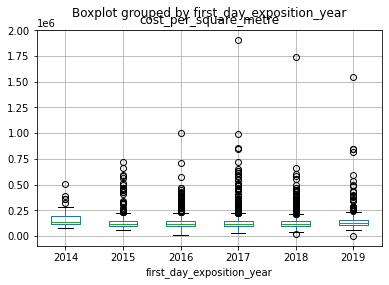

In [134]:
cleaned_real_estate_data_centr.boxplot(column= 'cost_per_square_metre', by = 'first_day_exposition_year')

(0.0, 300000.0)

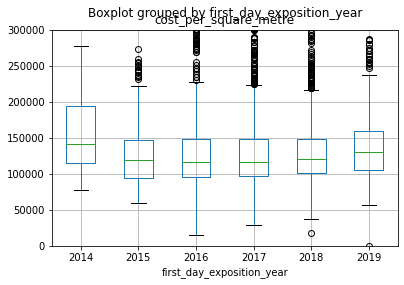

In [135]:
cleaned_real_estate_data_centr.boxplot(column= 'cost_per_square_metre', by = 'first_day_exposition_year')
plt.ylim((0, 3e5))

Из графиков видно, что медианная стоимость купленного жилья была наиболее высокой в 2014 году, а потом снижалась или оставалась примерно такой же (как это было и на графиках со всеми данными).

Зависимость стоимости квартир в центре от различных параметров в целом похожа на зависимость в общей выборке, за некоторыми исключениями:

а) Удаленность от центра в пределах рассматриваемых в этой зоне 9 км уже особо не влияет на стоимость квартиры.

б) По дате размещения объявления: самая высокая средняя цена - в марте (а в общем графике было в апреле).


Теперь посмотрим на численную оценку влияния различных параметров на цену за кв метр, для этого построим матрицу корреляций.

In [136]:
cleaned_real_estate_data_centr_corr_columns = cleaned_real_estate_data_centr[['cost_per_square_metre','total_area','rooms', 'floor_category', 'cityCenters_nearest', 'first_day_exposition_weekday', 'first_day_exposition_month', 'first_day_exposition_year']]
corr_centr = cleaned_real_estate_data_centr_corr_columns.corr()
corr_centr

,cost_per_square_metre,total_area,rooms,cityCenters_nearest,first_day_exposition_weekday,first_day_exposition_month,first_day_exposition_year
cost_per_square_metre,1.000000,0.271674,0.033914,-0.118926,0.009924,-0.009228,-0.000844
total_area,0.271674,1.000000,0.748917,-0.224841,0.010307,0.001473,-0.096067
rooms,0.033914,0.748917,1.000000,-0.266703,-0.011381,-0.001214,-0.075893
cityCenters_nearest,-0.118926,-0.224841,-0.266703,1.000000,0.010212,-0.013711,0.077163
first_day_exposition_weekday,0.009924,0.010307,-0.011381,0.010212,1.000000,0.030116,-0.008135
first_day_exposition_month,-0.009228,0.001473,-0.001214,-0.013711,0.030116,1.000000,-0.251394
first_day_exposition_year,-0.000844,-0.096067,-0.075893,0.077163,-0.008135,-0.251394,1.000000


<AxesSubplot:>

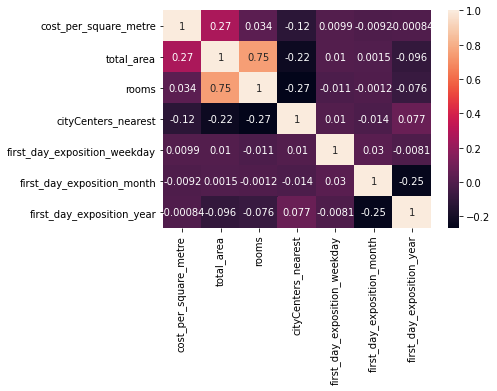

In [143]:
sns.heatmap(corr_centr, annot=True)

Сравним ее с данными по всей таблице:

<AxesSubplot:>

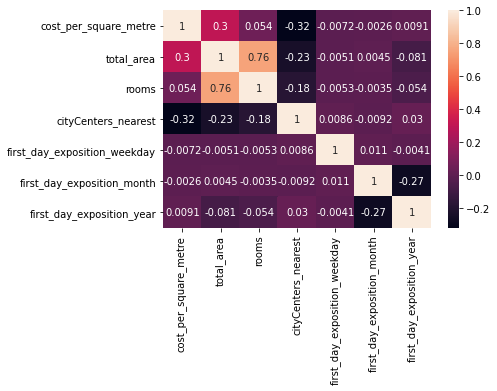

In [144]:
sns.heatmap(corr, annot=True)

В целом зависимости в центре почти такие же как и во всем остальном датасете, за исключением того, что расстояние от центра в рассматриваемых 9-10 км уже не так сильно влияет на цену.

### Вывод

1) Изучены следующие параметры: площадь, цена, число комнат, высота потолков (для всего датасета), для каждого из параметров были построены гистограммы и были сделаны выводы о типичных значениях этих величин:

- Площадь: 30- 80 кв метров;
Цена за кв метр: 55 - 120 тысяч рублей;   
Комнаты: 1-3;
Высота потолков: 2,5-3,2 метра.

2) Было изучено время продажи квартиры, посчитана среднее и медиана. Было выяснено сколько обычно занимает продажа и когда можно считать, что продажи прошли очень быстро, а когда необычно долго.

- В среднем квартиры продаются в течение первых 100 дней (примерно три месяца).

3) Были убраны редкие и выбивающиеся значения.

4) Было выяснено какие факторы больше всего влияют на стоимость квартиры. Изучено зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также была изучена зависимость от даты размещения: дня недели, месяца и года. Далее были выбраны 10 населённых пунктов с наибольшим числом объявлений и для них была посчитана среднюю цена квадратного метра. Были выделины населённые пункты с самой высокой и самой низкой стоимостью жилья.

- Цена квартиры зависит от площади квартиры, от кол-ва комнат (наиболее высокие цены за кв метр в 0 и в 7 комнатных квартирах, самые низкие в 3 и 9), от категории этажа (квартиры на первом этаже стоят дешевле, чем квартиры на последнем этаже, а квартиры на последнем этаже - дешевле, чем квартир на любом другом этаже,  кроме первого), от удаленности от центра (квартиры в пределах 10-20 км от центра стоят заметно дороже, а после 30-40 км цена уже не сильно отличается).

- Также было выяснено, что самая низкая средняя цена обычно в мае и июне, а самая высокая - в апреле.

- При этом есть зоны, где жилье наиболее дорогое, как в поселке Лисий Нос, и очень дешевое, как в деревне Ставрополье.

5) Были выделены квартиры в Санкт-Петербурге. После этого была посчитана средняя цена для каждого километра от центра и построен график зависимости средней цены от удалённости от центра. На основе этих данных было выяснено какая область входит в центр: это те квартиры, которые находятся не более чем в 9 км от центра.

6) Был выделен сегмент квартир в центре. Для этой территории были изучены следующие параметры: площадь, цена, число комнат, высота потолков. Также были рассмотрены параметры, влияющие на стоимость квартиры в центре (число комнат, этаж, удалённость от центра, дата размещения объявления) и найдены те из них, которые отличаются от общей выборки.

- Типичная квартира в центре Петербурга: Площадь: от 40 до 100 кв метров; Средняя цена за кв метр: 60 - 170 тысяч рублей; с 1-3 комнатами и высотой потолков 2,5 - 3,5 метра. То есть квартиры в среднем больше и дороже, чем все остальные квартиры в выборке.

Зависимость стоимости квартир в центре от различных параметров в целом похожа на зависимость в общей выборке, за некоторыми исключениями:

а) Удаленность от центра в пределах рассматриваемых в этой зоне 9 км уже особо не влияет на стоимость квартиры.

б) По дате размещения объявления: самая высокая средняя цена - в марте (а в общем графике было в апреле).

Для всей выборке и для квартир в центре также были построены матрицы корреляций и было выявлено, чо больше всего на цену влияет общая площадь квартиры, вторым сильным параметром является удаленность от центра (там корреляция отрицательная), но в центре этот параметр в пределах 9 км уже сильно не влияет на цену.

### Общий вывод

Анализ проводился для того, чтобы установить параметры, определяющие рыночную стоимость объектов недвижимости, на основе которых потом будет построена автоматизированная система, отслеживающая аномалии и мошенническую деятельность.

В ходе анализа было выяснено, что на цену квартиры в общей выборке влияют:

- квадратного метра (чем больше площадь - тем выше цена);
- кол-во комнат (от 0 до 7 комнат медианное значение постоянно растет, потом колеблется);
- категория этажа (квартиры на первом этаже стоят дешевле, чем квартиры на последнем этаже, а квартиры на последнем этаже - дешевле, чем квартир на любом другом этаже,  кроме первого);
- удаленность от центра (квартиры в пределах 10-20 км от центра стоят заметно дороже, а после 30-40 км цена уже не сильно отличается).
- амая низкая средняя цена обычно в июне, а самая высокая - в апреле (колебание где-то в полмиллиона)., и если посмотреть по годам, то средняя стоимость жилья с 2015 до 2019 года упала примерно на 1-1,5 млн.

При этом на цену в центре Петербурга влияют те же факторы, но есть некоторые изменения:
- Разница в категории этажей влияет на цену заметнее/сильнее.
- Удаленность от центра в пределах рассматриваемых в этой зоне 9 км уже особо не влияет на стоимость квартиры.
- По дате размещения объявления: самая низкая средняя цена по выборке в центре попадает на декабрь, а самая высокая средняя цена - в сентябре и ноябре.


